In [1]:
from preprocessing import *

/home/sam/.conda/envs/YOLOv5/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


0
Labeled images: 422


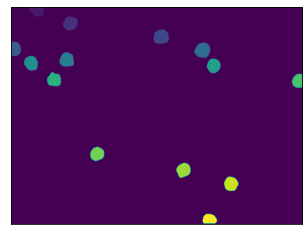

In [2]:
show(torch.from_numpy(labeled_images[-1]))

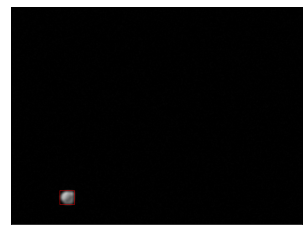

In [3]:
show_drawn_boxes(30)

In [4]:
import cv2 as cv

In [5]:
cell_bbox = []
one_cell_indices = []

for i in range(len(boxes_list)):
    if len(boxes_list[i]) == 1:
        cell_bbox.append(boxes_list[i])
        one_cell_indices.append(indices[i])

In [6]:
print(cell_bbox[0])

tensor([[438.,   2., 471.,  35.]])


In [7]:
print(len(cell_bbox))
print(len(one_cell_indices))

182
182


In [8]:
print(images_path[0])

cell_images/0.png


In [9]:
print(images_path[0][12:-4]==one_cell_indices[0])
print(type(one_cell_indices[0]))

False
<class 'int'>


In [10]:
t = 0
print(type(t))

<class 'int'>


In [11]:
one_cell_images = []

j = 0

for i in range(len(images_path)):
    temp_path = int(images_path[i][12:-4])
    if temp_path == one_cell_indices[j]:
        one_cell_images.append(images[i])
        j += 1
        if j == len(one_cell_indices):
            break

In [12]:
print(len(one_cell_images))

182


In [13]:
print(len(one_cell_images))

182


In [14]:
print(cell_bbox[0])

tensor([[438.,   2., 471.,  35.]])


In [15]:
print(cell_bbox[0].tolist()[0])

[438.0, 2.0, 471.0, 35.0]


In [16]:
mj = (0, 0, 0, 0)
print(tuple(cell_bbox[0].tolist()[0]))

(438.0, 2.0, 471.0, 35.0)


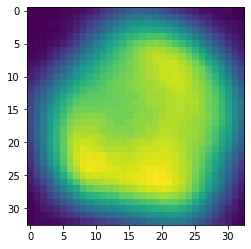

In [17]:
plt.imshow(Image.fromarray(one_cell_images[0]).crop(tuple(cell_bbox[0].tolist()[0])))

In [18]:
print(len(boxes_list), len(labeled_images))

422 422


In [21]:
print(tuple(boxes_list[10].tolist()[0]))

(458.0, 271.0, 493.0, 304.0)


In [31]:
def tensor_to_tuple(tensor):
    return tuple(tensor.tolist()[0])

In [32]:
print(type(tensor_to_tuple(boxes_list[0])))

<class 'tuple'>


In [49]:
cropped_images = []

for i in range(len(one_cell_images)):
    cropped_images.append(Image.fromarray(one_cell_images[i]).crop(tuple(cell_bbox[i].tolist()[0])))
    #print() #.crop(cell_bbox[i].tolist())
    #print(cell_bbox[i].tolist(), i)

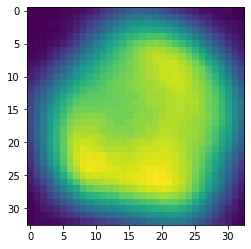

In [42]:
plt.imshow(Image.fromarray(one_cell_images[0]).crop((438,   2, 471,  35)))

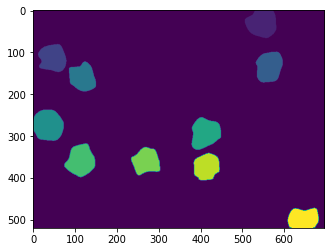

In [47]:
plt.imshow(labeled_images[200])

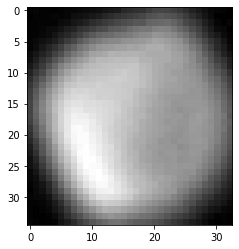

In [51]:
plt.imshow(cropped_images[20], cmap="gray")